In [35]:
import pandas as pd
df = pd.read_excel('datasets/FIT.xlsx', engine='openpyxl')
df = df.loc[:, :'kyw']
df.rename(columns={'g': 'name', 'a Type': 'type', 'a Time': 'date'
    , 'j Tiltle': 'job title','rmtWrk': 'remote','kyw': 'key words' }, inplace=True)
df.head()


,name,type,date,job title,remote,city,knw,fTime,gender,prj,mil,aText,key words
0,فناوران اطلاعات پیشخوان ایرانیان,pr,99-8,database administrator,no,تهران,no,yes,both,no,no,استخدام مدیر پایگاه داده‌ها MySQL \nنوع همکاری...,mysql database
1,پردازش مجازی رامین,pr,99-8,back-end developer,yes,تهران,no,yes,both,no,no,تسلط کامل بر Node.js و Typescript\nتجربه کار ب...,typescript nodejs back-end rest-api
2,توسعه ایده پایدار پاک,pr,99-8,junior back-end developer,no,تهران,no,yes,both,no,no,استخدام توسعه‌دهنده Back-end\nحقوق تا ۶ میلیون...,nodejs microservice mongodb nginx
3,تاژان سیستم,pr,99-8,full-stack developer,no,تهران,no,yes,both,no,no,مهارت های فردی:\n\n• دارا بودن روحیه حل...,full-stack c# asp.net sql-server linq
4,توسعه ارتباطات راشا,pr,99-8,senior java developer,yes,تهران,no,yes,both,no,no,Job Requirements:\n\n\nExperience with Java an...,java postgresql databases soap rest json nosql...


In [10]:
pr_df = df[df['type'] == 'pr']
gov_df = df[df['type'] == 'gov']
print(f'Number of Private company: {pr_df.shape[0]}')
print(f'Number of Goverment company: {gov_df.shape[0]}')

Number of Private company: 1279
Number of Goverment company: 9


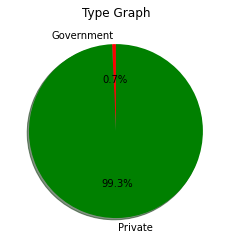

In [11]:
import matplotlib.pyplot as plt

slices = [gov_df.shape[0], pr_df.shape[0]]
activities = ['Government','Private']
cols = ['r','g']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow= True,
        autopct='%1.1f%%')

plt.title('Type Graph')
plt.show()

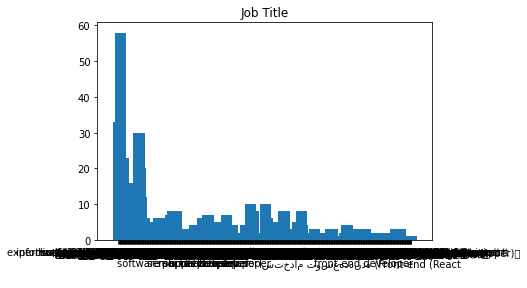

In [88]:
import numpy as np
j_title = df['job title'].values.tolist()
x = []
y = []
for title in df['job title'].unique():
    if title is not np.nan:
        # print(f'{type(title)}: {title}: {j_title.count(title)}')
        x += [title]
        y += [j_title.count(title)]
plt.bar(x, y, width = 30)
plt.title('Job Title') 
plt.show()

Legends:
0: تهران %71.06
1: نیشابور %0.30
2: مشهد %2.97
3: اصفهان %7.84
4: شیراز %1.60
5: آمل %0.08
6: قم %0.46
7: گرگان %0.23
8: قزوین %0.53
9: کرمان %1.07
10: تهران  %0.53
11: انگلستان %0.08
12: رشت %0.08
13: تبریز %1.75
14: کاشان %0.08
15: البرز %0.61
16: زنجان %0.30
17: سنندج %0.08
18: فارس %1.68
19: یندرعباس %0.08
20: کرج %0.76
21: قشم %0.15
22: یزد %1.60
23: اراک %0.08
24: بوت کمپ مپصا %0.08
25: مازندران %0.23
26: گیلان %1.22
27: گیلان  %0.23
28: گلستان %0.15
29: خوزستان %0.15
30: همدان %0.23
31: نبریز %0.08
32: خراسان جنوبی %0.15
33: اهواز %0.30
34: آبادان %0.23
35: اصفهان  %0.15
36:  اصفهان %0.15
37: کرمانشاه %0.08
38: کردستان %0.23
39: کرمان  %0.38
40: خراسان رضوی %1.14
41: هرمزگان %0.15
42: تهرن %0.08
43: آذربایجان شرقی %0.08
44: بندرعباس %0.08
45: کرمانشاه  %0.15
46: ساری %0.08
47: بهارستان %0.08
48: لاهیجان %0.08
49: سمنان %0.08


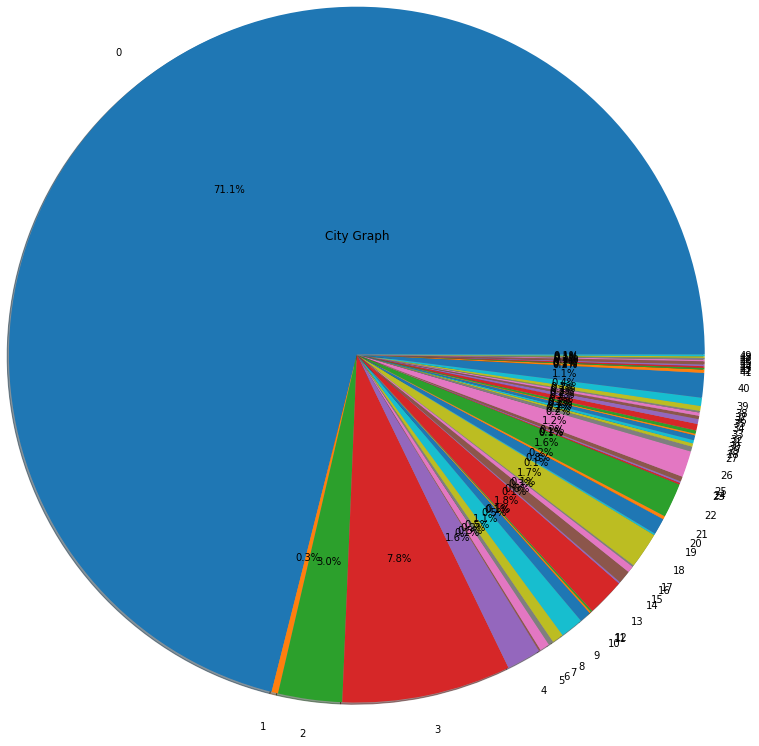

In [86]:
cities = df['city'].values.tolist()
city = []
slices= []
keys = [*range(50)]
for name in df['city'].unique():
    if name is not np.nan:
        city += [name]
        slices += [cities.count(name)]
plt.pie(slices,
        labels=keys,
        shadow= True,
        autopct='%1.1f%%',
        radius = 4)
print('Legends:')
for i, k in enumerate(city):
    p = slices[i]/sum(slices)*100
    print('{}: {} %{p:.2f}'.format(i, k, p=p))
plt.title('City Graph')
plt.show()

In [43]:
new_df = df.copy()
new_df.set_index('date', inplace=True)
new_df.dropna(inplace=True)
# new_df.sort_index(inplace=True)
new_df.to_excel('datasets/new.xlsx')
print('There nothing special about date and all between 7 till 10 of year 1399')


There nothing special about date and all between 7 till 10 of year 1399


['no' 'yes' 'n' 'No' 'Yes' 'no ' ' no']


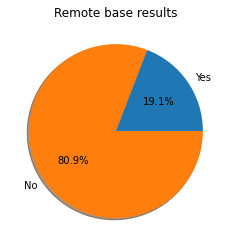

In [90]:
remote = df['remote'].dropna()
print(remote.unique())
statistical = remote.value_counts()
no_remote = statistical['no'] + statistical['No'] + statistical[' no'] + statistical['no '] + statistical['n']
yes_remote = statistical['yes'] + statistical['Yes']

plt.pie([yes_remote, no_remote],
        labels=['Yes', 'No'],
        shadow= True,
        autopct='%1.1f%%',radius = 1)
plt.title('Remote base results')
plt.show()
